# Radio Foundation Models Lab

![Radio Foundation Model](https://drive.google.com/uc?export=view&id=1QwFZSPN28VRSRgCoT-1m75MWaGfsqhtp)

In this lab, we will fine-tune a pretrained radio foundation model with a Vision Transformer architecture for various tasks:

- **Radio Signal Identification**: Classify a radio signal based on its spectrogram representation into one of 20 classes, including WiFi, Cellular, Bluetooth, LoRa, and others.
- **Human Activity Sensing**: Detect human activity near WiFi access points operating as passive radars. Channel state information is used to classify activities into one of six categories: running, walking, falling, floor cleaning, boxing, and arm circling.
- **5G Positioning**: Utilize 5G sounding reference signals to compute users' channel state information and estimate their positions.

More details about the tasks will be provided in the notebook. If you're interested in learning more about how the model is pretrained, please refer to this [paper](https://arxiv.org/abs/2411.09996).


## **⚠️ Important:**  

### Downloading the Datasets  

Before proceeding, you need to download the datasets. Visit the following [link](https://uofc-my.sharepoint.com/:f:/g/personal/ahmed_aboulfotouh_ucalgary_ca/EoNyesd8BQFDqwm4GVN3bWQBLmtX55MU-cgn_9W4OjNdAA?e=AFwtZK), where you will find three directories:  

- `radio_signal_identification`  
- `human_activity_sensing`  
- `5g_positioning`  

We recommend creating a directory named **`data`** in your working directory and organizing the datasets into three subdirectories with the same names.  


### Downloading the Models  

Next, download the pretrained models from this [link](https://uofc-my.sharepoint.com/:f:/g/personal/ahmed_aboulfotouh_ucalgary_ca/Ejr2YYjJZrpFkXuUo61y-38BEwEKxiPYMGbIcrhJhGeMyQ?e=NfpIvC). There are three different models, varying in size:  

- **Small**: `pretrained_small_75.pth`  
- **Medium**: `pretrained_medium_75.pth`  
- **Large**: `pretrained_large_75.pth`  

We recommend using the **small model** for fine-tuning; however, feel free to experiment with other model sizes.  

For organization, we suggest creating a **`checkpoints`** directory in your working directory to store the pretrained models.

### 📌 **Required Installations**
If you haven't installed all the required dependencies, run the following command to ensure the required libraries are installed:

```bash
pip install numpy matplotlib torch timm scipy tqdm scikit-learn seaborn h5py pillow torchvision timm
```

If you are using **google colaboratory**, skip this step.

## [1] Imports  

In this section, we install and import the necessary libraries required for the code to run.  

In [ ]:
import os

def modify_filenames(directory, n):
    """
    Function to add underscores in filename, removes errors for images from the same audio file
    """
    # Get all files in the directory
    for filename in os.listdir(directory):
        # Skip directories
        if os.path.isdir(os.path.join(directory, filename)):
            continue

        # Remove all underscores from the filename
        new_filename = filename.replace("_", "")

        # Insert underscore at the nth position (if n is within the new filename length)
        if n < len(new_filename):
            new_filename = new_filename[:n] + "_" + new_filename[n:]

        # Create full file paths
        old_file_path = os.path.join(directory, filename)
        new_file_path = os.path.join(directory, new_filename)

        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f"Renamed: {filename} -> {new_filename}")


modify_filenames('audio_processing/sample_dataset/arabic', 6)
modify_filenames('audio_processing/sample_dataset/english', 7)
modify_filenames('audio_processing/sample_dataset/german', 6)
modify_filenames('audio_processing/sample_dataset/mandarin', 8)
modify_filenames('audio_processing/sample_dataset/spanish', 7)
modify_filenames('audio_processing/sample_dataset/garbage_audio', 7)
modify_filenames('audio_processing/sample_dataset/french', 6)

Renamed: arabic_019058307000.png -> arabic_019058307000.png
Renamed: arabic_019058308000.png -> arabic_019058308000.png
Renamed: arabic_019058309000.png -> arabic_019058309000.png
Renamed: arabic_019058310000.png -> arabic_019058310000.png
Renamed: arabic_019058311000.png -> arabic_019058311000.png
Renamed: arabic_019058343000.png -> arabic_019058343000.png
Renamed: arabic_019058344000.png -> arabic_019058344000.png
Renamed: arabic_019058345000.png -> arabic_019058345000.png
Renamed: arabic_019058346000.png -> arabic_019058346000.png
Renamed: arabic_019058347000.png -> arabic_019058347000.png
Renamed: arabic_019058363000.png -> arabic_019058363000.png
Renamed: arabic_019058364000.png -> arabic_019058364000.png
Renamed: arabic_019058365000.png -> arabic_019058365000.png
Renamed: arabic_019058366000.png -> arabic_019058366000.png
Renamed: arabic_019058368000.png -> arabic_019058368000.png
Renamed: arabic_019058370000.png -> arabic_019058370000.png
Renamed: arabic_019058373000.png -> arab

In [ ]:
import shutil
import os

def copy_all_files(src_dir, dest_dir):
    """
    Create single languages folder from existing data
    """
    # Ensure destination directory exists
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)  # Create the destination directory if it doesn't exist
    
    # Loop through all files and directories in the source directory
    for item in os.listdir(src_dir):
        src_path = os.path.join(src_dir, item)
        dest_path = os.path.join(dest_dir, item)
        
        # Check if it's a file or directory and copy accordingly
        if os.path.isdir(src_path):
            # Recursively copy the directory and its contents
            shutil.copytree(src_path, dest_path)
        else:
            # Copy the file
            shutil.copy2(src_path, dest_path)  # copy2 to preserve metadata (timestamps, etc.)
    
    print(f"All contents from {src_dir} have been copied to {dest_dir}")

copy_all_files('audio_processing/sample_dataset/arabic', 'languages')
copy_all_files('audio_processing/sample_dataset/english', 'languages')
copy_all_files('audio_processing/sample_dataset/german', 'languages')
copy_all_files('audio_processing/sample_dataset/mandarin', 'languages')
copy_all_files('audio_processing/sample_dataset/spanish', 'languages')
copy_all_files('audio_processing/sample_dataset/garbage_audio', 'languages')
copy_all_files('audio_processing/sample_dataset/french', 'languages')

All contents from audio_processing/sample_dataset/arabic have been copied to languages
All contents from audio_processing/sample_dataset/english have been copied to languages
All contents from audio_processing/sample_dataset/german have been copied to languages
All contents from audio_processing/sample_dataset/mandarin have been copied to languages
All contents from audio_processing/sample_dataset/spanish have been copied to languages
All contents from audio_processing/sample_dataset/garbage_audio have been copied to languages
All contents from audio_processing/sample_dataset/french have been copied to languages


In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from pathlib import Path
from random import sample
from PIL import Image
import timm.models.vision_transformer
from timm.layers import trunc_normal_
import math
import sys
from typing import Iterable
from timm.utils import accuracy
import datetime
import time
from collections import defaultdict, deque
import torch.distributed as dist
from torch.utils.data import DataLoader, random_split, Subset
from torch import nn
from functools import partial
import torch.nn.functional as F
from scipy.io import loadmat
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns
from torch.utils.data import Dataset
import re
import h5py
from torchvision import models
from torchvision.transforms import (
    Grayscale, ToTensor, Compose, Resize, InterpolationMode, Normalize, Lambda, RandomPerspective, RandomCrop
)
plt.rcParams['font.family'] = 'serif'

## [2] Setup & Utilities

This section contains **important setup code** for model training and evaluation. You may skip the details, but ensure the utilities are executed before proceeding.

### Training Verbose Utilities
These utilities are optional to look through and understand. They are used for printing logs and tracking performance during training.

In [43]:
def is_dist_avail_and_initialized():
    if not dist.is_available():
        return False
    if not dist.is_initialized():
        return False
    return True


class SmoothedValue(object):
    """Track a series of values and provide access to smoothed values over a
    window or the global series average.
    """

    def __init__(self, window_size=20, fmt=None):
        if fmt is None:
            fmt = "{median:.4f} ({global_avg:.4f})"
        self.deque = deque(maxlen=window_size)
        self.total = 0.0
        self.count = 0
        self.fmt = fmt

    def update(self, value, n=1):
        self.deque.append(value)
        self.count += n
        self.total += value * n

    def synchronize_between_processes(self):
        """
        Warning: does not synchronize the deque!
        """
        if not is_dist_avail_and_initialized():
            return
        t = torch.tensor([self.count, self.total], dtype=torch.float64, device='cuda')
        dist.barrier()
        dist.all_reduce(t)
        t = t.tolist()
        self.count = int(t[0])
        self.total = t[1]

    @property
    def median(self):
        d = torch.tensor(list(self.deque))
        return d.median().item()

    @property
    def avg(self):
        d = torch.tensor(list(self.deque), dtype=torch.float32)
        return d.mean().item()

    @property
    def global_avg(self):
        return self.total / self.count

    @property
    def max(self):
        return max(self.deque)

    @property
    def value(self):
        return self.deque[-1]

    def __str__(self):
        return self.fmt.format(
            median=self.median,
            avg=self.avg,
            global_avg=self.global_avg,
            max=self.max,
            value=self.value)


class MetricLogger(object):
    def __init__(self, delimiter="\t"):
        self.meters = defaultdict(SmoothedValue)
        self.delimiter = delimiter

    def update(self, **kwargs):
        for k, v in kwargs.items():
            if v is None:
                continue
            if isinstance(v, torch.Tensor):
                v = v.item()
            assert isinstance(v, (float, int))
            self.meters[k].update(v)

    def __getattr__(self, attr):
        if attr in self.meters:
            return self.meters[attr]
        if attr in self.__dict__:
            return self.__dict__[attr]
        raise AttributeError("'{}' object has no attribute '{}'".format(
            type(self).__name__, attr))

    def __str__(self):
        loss_str = []
        for name, meter in self.meters.items():
            loss_str.append(
                "{}: {}".format(name, str(meter))
            )
        return self.delimiter.join(loss_str)

    def synchronize_between_processes(self):
        for meter in self.meters.values():
            meter.synchronize_between_processes()

    def add_meter(self, name, meter):
        self.meters[name] = meter

    def log_every(self, iterable, print_freq, header=None):
        i = 0
        if not header:
            header = ''
        start_time = time.time()
        end = time.time()
        iter_time = SmoothedValue(fmt='{avg:.4f}')
        data_time = SmoothedValue(fmt='{avg:.4f}')
        space_fmt = ':' + str(len(str(len(iterable)))) + 'd'
        log_msg = [
            header,
            '[{0' + space_fmt + '}/{1}]',
            'eta: {eta}',
            '{meters}',
            'time: {time}',
            'data: {data}'
        ]
        if torch.cuda.is_available():
            log_msg.append('max mem: {memory:.0f}')
        log_msg = self.delimiter.join(log_msg)
        MB = 1024.0 * 1024.0
        for obj in iterable:
            data_time.update(time.time() - end)
            yield obj
            iter_time.update(time.time() - end)
            if i % print_freq == 0 or i == len(iterable) - 1:
                eta_seconds = iter_time.global_avg * (len(iterable) - i)
                eta_string = str(datetime.timedelta(seconds=int(eta_seconds)))
                if torch.cuda.is_available():
                    print(log_msg.format(
                        i, len(iterable), eta=eta_string,
                        meters=str(self),
                        time=str(iter_time), data=str(data_time),
                        memory=torch.cuda.max_memory_allocated() / MB))
                else:
                    print(log_msg.format(
                        i, len(iterable), eta=eta_string,
                        meters=str(self),
                        time=str(iter_time), data=str(data_time)))
            i += 1
            end = time.time()
        total_time = time.time() - start_time
        total_time_str = str(datetime.timedelta(seconds=int(total_time)))
        print('{} Total time: {} ({:.4f} s / it)'.format(
            header, total_time_str, total_time / len(iterable)))


### Learning and Optimization Utilities  

These utilities handle learning rate scheduling, gradient scaling, and other optimization techniques. They are quite complex, so feel free to skip them.  


In [44]:
def adjust_learning_rate(optimizer, epoch, warmup_epochs, lr, min_lr=1e-6):
    """Decay the learning rate with half-cycle cosine after warmup"""
    if epoch < warmup_epochs:
        lr = lr * epoch / warmup_epochs
    else:
        lr = min_lr + (lr - min_lr) * 0.5 * \
            (1. + math.cos(math.pi * (epoch - warmup_epochs) / (epochs - warmup_epochs)))
    for param_group in optimizer.param_groups:
        if "lr_scale" in param_group:
            param_group["lr"] = lr * param_group["lr_scale"]
        else:
            param_group["lr"] = lr
    return lr

def get_layer_id_for_vit(name, num_layers):
    """
    Assign a parameter with its layer id
    Following BEiT: https://github.com/microsoft/unilm/blob/master/beit/optim_factory.py#L33
    """
    if name in ['cls_token', 'pos_embed']:
        return 0
    elif name.startswith('patch_embed'):
        return 0
    elif name.startswith('blocks'):
        return int(name.split('.')[1]) + 1
    else:
        return num_layers

def param_groups_lrd(model, weight_decay=0.05, no_weight_decay_list=[], layer_decay=.75):
    """
    Parameter groups for layer-wise lr decay
    Following BEiT: https://github.com/microsoft/unilm/blob/master/beit/optim_factory.py#L58
    """
    param_group_names = {}
    param_groups = {}

    num_layers = 53#len(model.blocks) + 1

    layer_scales = list(layer_decay ** (num_layers - i) for i in range(num_layers + 1))

    for n, p in model.named_parameters():
        if not p.requires_grad:
            continue

        # no decay: all 1D parameters and model specific ones
        if p.ndim == 1 or n in no_weight_decay_list:
            g_decay = "no_decay"
            this_decay = 0.
        else:
            g_decay = "decay"
            this_decay = weight_decay

        layer_id = get_layer_id_for_vit(n, num_layers)
        group_name = "layer_%d_%s" % (layer_id, g_decay)

        if group_name not in param_group_names:
            this_scale = layer_scales[layer_id]

            param_group_names[group_name] = {
                "lr_scale": this_scale,
                "weight_decay": this_decay,
                "params": [],
            }
            param_groups[group_name] = {
                "lr_scale": this_scale,
                "weight_decay": this_decay,
                "params": [],
            }

        param_group_names[group_name]["params"].append(n)
        param_groups[group_name]["params"].append(p)

    # print("parameter groups: \n%s" % json.dumps(param_group_names, indent=2))

    return list(param_groups.values())

def get_grad_norm_(parameters, norm_type: float = 2.0) -> torch.Tensor:
    if isinstance(parameters, torch.Tensor):
        parameters = [parameters]
    parameters = [p for p in parameters if p.grad is not None]
    norm_type = float(norm_type)
    if len(parameters) == 0:
        return torch.tensor(0.)
    device = parameters[0].grad.device
    if norm_type == torch.inf:
        total_norm = max(p.grad.detach().abs().max().to(device) for p in parameters)
    else:
        total_norm = torch.norm(torch.stack([torch.norm(p.grad.detach(), norm_type).to(device) for p in parameters]), norm_type)
    return total_norm

class NativeScalerWithGradNormCount:
    state_dict_key = "amp_scaler"

    def __init__(self):
        self._scaler = torch.cuda.amp.GradScaler()

    def __call__(self, loss, optimizer, clip_grad=None, parameters=None, create_graph=False, update_grad=True):
        self._scaler.scale(loss).backward(create_graph=create_graph)
        if update_grad:
            if clip_grad is not None:
                assert parameters is not None
                self._scaler.unscale_(optimizer)  # unscale the gradients of optimizer's assigned params in-place
                norm = torch.nn.utils.clip_grad_norm_(parameters, clip_grad)
            else:
                self._scaler.unscale_(optimizer)
                norm = get_grad_norm_(parameters)
            self._scaler.step(optimizer)
            self._scaler.update()
        else:
            norm = None
        return norm

    def state_dict(self):
        return self._scaler.state_dict()

    def load_state_dict(self, state_dict):
        self._scaler.load_state_dict(state_dict)


class LabelSmoothingCrossEntropy(nn.Module):
    """ NLL loss with label smoothing.
    """
    def __init__(self, smoothing=0.1):
        super(LabelSmoothingCrossEntropy, self).__init__()
        assert smoothing < 1.0
        self.smoothing = smoothing
        self.confidence = 1. - smoothing

    def forward(self, x: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
        logprobs = F.log_softmax(x, dim=-1)
        nll_loss = -logprobs.gather(dim=-1, index=target.unsqueeze(1))
        nll_loss = nll_loss.squeeze(1)
        smooth_loss = -logprobs.mean(dim=-1)
        loss = self.confidence * nll_loss + self.smoothing * smooth_loss
        return loss.mean()

### Model Training Utilities  

This section contains utility functions that will be useful across all tasks.  

In [45]:
def train_one_epoch(model: torch.nn.Module, criterion: torch.nn.Module,
                    data_loader: Iterable, optimizer: torch.optim.Optimizer,
                    device: torch.device, epoch: int, warmup_epochs: int, lr, loss_scaler,
                    task: str = "classification"):
    """
    Trains the model for one epoch, supporting both classification and regression tasks.

    Parameters:
    ----------
    model : torch.nn.Module
        The model to train.
    criterion : torch.nn.Module
        The loss function.
    data_loader : Iterable
        The dataset loader.
    optimizer : torch.optim.Optimizer
        The optimizer used for training.
    device : torch.device
        Device to run training on (CPU or GPU).
    epoch : int
        Current epoch number.
    loss_scaler : callable
        Function to scale loss for mixed precision training.
    max_norm : float, optional
        Gradient clipping norm, by default 0.
    log_writer : object, optional
        Logger for TensorBoard, by default None.
    args : object, optional
        Additional training arguments.
    task : str, optional
        Task type: `"classification"` or `"regression"`, by default `"classification"`.

    Returns:
    -------
    dict
        Averaged metrics (loss, accuracy if classification).
    """
    model.train(True)
    metric_logger = MetricLogger(delimiter="  ")
    metric_logger.add_meter('lr', SmoothedValue(window_size=1, fmt='{value:.6f}'))
    header = f'Epoch: [{epoch}]'
    print_freq = 20

    optimizer.zero_grad()


    for data_iter_step, (samples, targets, filename) in enumerate(metric_logger.log_every(data_loader, print_freq, header)):

        # Adjust learning rate per iteration
        adjust_learning_rate(optimizer, data_iter_step / len(data_loader) + epoch, warmup_epochs, lr)

        samples, targets = samples.to(device, non_blocking=True), targets.to(device, non_blocking=True)

        # Forward pass
        with torch.cuda.amp.autocast():
            outputs = model(samples)
            loss = criterion(outputs, targets)

        loss_value = loss.item()
        if not math.isfinite(loss_value):
            print(f"Loss is {loss_value}, stopping training")
            sys.exit(1)

        # Backpropagation
        loss_scaler(loss, optimizer, parameters=model.parameters(), create_graph=False,
                    update_grad=True)
        optimizer.zero_grad()

        #torch.cuda.synchronize()

        # Update metrics
        metric_logger.update(loss=loss_value)

        if task == "classification":
            acc1, acc3 = accuracy(outputs, targets, topk=(1, 3))
            metric_logger.meters['acc1'].update(acc1.item(), n=samples.shape[0])
            metric_logger.meters['acc3'].update(acc3.item(), n=samples.shape[0])

        # Track learning rate
        max_lr = max(group["lr"] for group in optimizer.param_groups)
        metric_logger.update(lr=max_lr)

    # Synchronize metrics across processes
    metric_logger.synchronize_between_processes()
    print("Averaged stats:", metric_logger)

    return {k: meter.global_avg for k, meter in metric_logger.meters.items()}


@torch.no_grad()
def evaluate(data_loader, model, criterion, device, task: str = "classification"):
    """
    Evaluates the model on the provided dataset.

    Parameters:
    ----------
    data_loader : Iterable
        Dataset loader.
    model : torch.nn.Module
        The model to evaluate.
    criterion : torch.nn.Module
        Loss function.
    device : torch.device
        Device for evaluation.
    task : str, optional
        Task type: `"classification"` or `"regression"`, by default `"classification"`.

    Returns:
    -------
    dict
        Averaged evaluation metrics.
    """
    metric_logger = MetricLogger(delimiter="  ")
    header = 'Test:'

    model.eval()

    for batch in metric_logger.log_every(data_loader, 10, header):
        images, targets, filename = batch[0].to(device, non_blocking=True), batch[1].to(device, non_blocking=True), batch[2]

        # Compute output
        with torch.cuda.amp.autocast():
            outputs = model(images)
            loss = criterion(outputs, targets)

        metric_logger.update(loss=loss.item())

        if task == "classification":
            acc1, acc3 = accuracy(outputs, targets, topk=(1, 3))
            metric_logger.meters['acc1'].update(acc1.item(), n=images.shape[0])
            metric_logger.meters['acc3'].update(acc3.item(), n=images.shape[0])

    # Synchronize metrics across processes
    metric_logger.synchronize_between_processes()

    if task == "classification":
        print('* Acc@1 {top1.global_avg:.3f} Acc@3 {top3.global_avg:.3f} loss {losses.global_avg:.3f}'
              .format(top1=metric_logger.acc1, top3=metric_logger.acc3, losses=metric_logger.loss))
    else:
        print('* Loss {losses.global_avg:.3f}'.format(losses=metric_logger.loss))

    return {k: meter.global_avg for k, meter in metric_logger.meters.items()}


In [ ]:
#Implement single freeze model function to test transfer learning when not using vision transformer
def freeze_model(model, num_blocks: int):
    """
    Freezes the model layers to prevent updates during training.
    Parameters:
    ----------
    num_blocks : int
        The number of layers to freeze.
    """
    for i, (name, module) in enumerate(model.named_children()):
        if i < num_blocks:
            for param in module.parameters():
                param.requires_grad = False
        else:
            for param in module.parameters():
                param.requires_grad = True

## [3] Vision Transformer Class  

This section defines a **custom Vision Transformer (ViT) model** that extends the `timm` implementation. This is the architecture we use for the **Radio Foundation Model**.

### Key Features:
- **Global Pooling Support:**  
  - Supports different pooling strategies (`'token'`, `'avg'`, `'max'`, etc.).
- **Tanh Activation:**  
  - Can apply a **tanh activation function** in the output.
- **Encoder Freezing:**  
  - Allows freezing either the **entire transformer encoder** or **a specified number of blocks**.
- **Pretrained Model Loading:**  
  - Implements methods to **load weights from a checkpoint**.  

This model is designed to be flexible and easily integrated into various tasks.


In [47]:
class VisionTransformer(timm.models.vision_transformer.VisionTransformer):
    """
    A custom Vision Transformer (ViT) model extending the timm VisionTransformer implementation.

    This class supports:
    - **Global Pooling Strategies**: Allows different pooling methods ('token', 'avg', 'max', etc.).
    - **Tanh Activation**: Applies tanh activation to the output if enabled.
    - **Encoder Freezing**: Allows freezing part or all of the transformer encoder.
    - **Checkpoint Handling**: Supports loading model weights from a checkpoint.

    Attributes:
    ----------
    task : str, required
        Specifies the task ('signal_identification', 'sensing', 'positioning')
    global_pool : str
        The pooling method to apply. Options: 'token', 'avg', 'max', etc.
    tanh : bool
        Applies tanh activation to the final output if set to True.
    """

    def __init__(self, task: str, global_pool: str = "token", tanh: bool = False, **kwargs):
        """
        Initializes the Vision Transformer model.

        Parameters:
        ----------
        global_pool : str, optional
            Specifies the pooling method ('token', 'avg', 'max', etc.), by default "token".
        tanh : bool, optional
            Whether to apply tanh activation to the output, by default False.
        kwargs : dict
            Additional arguments for the base VisionTransformer class.
        """
        super(VisionTransformer, self).__init__(**kwargs)
        self.task = task
        self.global_pool = global_pool
        self.tanh = tanh

    def freeze_encoder(self, num_blocks: int = None):
        """
        Freezes the transformer encoder to prevent updates during training.

        Parameters:
        ----------
        num_blocks : int, optional
            The number of transformer blocks to freeze. If None, freezes the entire encoder.
        """
        if num_blocks is None:
            for param in self.blocks.parameters():
                param.requires_grad = False
        else:
            for param in self.blocks[:num_blocks].parameters():
                param.requires_grad = False

        # Also freeze the patch embedding layer
        for param in self.patch_embed.proj.parameters():
            param.requires_grad = False

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the Vision Transformer.

        Parameters:
        ----------
        x : torch.Tensor
            Input tensor of shape (batch_size, channels, height, width).

        Returns:
        -------
        torch.Tensor
            Output tensor after the forward pass.
        """
        x = self.forward_features(x)  # Extracts features using the transformer backbone
        x = self.forward_head(x)  # Passes features through the classifier head

        if self.tanh:
            return torch.tanh(x)  # Applies tanh activation if enabled
        return x

    def save_model(self, path: str):
        """
        Saves the model's state dictionary to a checkpoint file.

        Parameters:
        ----------
        path : str
            Path where the model checkpoint will be saved.
        """
        checkpoint = {
            "model": self.state_dict(),  # Save model weights
        }

        torch.save(checkpoint, path)
        print(f"Model successfully saved to {path}")

    def load_model(self, checkpoint_path: str) -> dict:
        """
        Loads model weights from a given checkpoint file.

        Parameters:
        ----------
        checkpoint_path : str
            Path to the checkpoint file.

        Returns:
        -------
        dict
            A message indicating the status of the checkpoint loading.
        """
        checkpoint = torch.load(checkpoint_path, map_location='cpu')  # Load checkpoint
        checkpoint_model = checkpoint['model']  # Extract model weights
        msg = self.load_state_dict(checkpoint_model, strict=True)  # Load state dictionary
        return msg  # Return loading message

    def load_from_pretrained(self, path: str):
        """
        Loads a model from a pretrained checkpoint while handling task-specific modifications.

        Parameters:
        ----------
        path : str
            Path to the pretrained model checkpoint.

        Returns:
        -------
        msg : dict
            A message from `load_state_dict()` indicating missing/unexpected keys.
        """
        # Load checkpoint
        checkpoint = torch.load(path, map_location='cpu')
        checkpoint_model = checkpoint.get('model', {})

        # Get current model's state dictionary
        state_dict = self.state_dict()

        # Define keys to be removed if mismatched
        keys_to_remove = ['head.weight', 'head.bias']

        if self.task in ['sensing', 'positioning']:
            keys_to_remove.append('pos_embed')

        # Remove incompatible keys
        for key in keys_to_remove:
            if key in checkpoint_model and checkpoint_model[key].shape != state_dict[key].shape:
                print(f"Removing key {key} from pretrained checkpoint")
                del checkpoint_model[key]

        # Adjust patch embedding projection layer for specific tasks
        patch_embed_key = 'patch_embed.proj.weight'
        if self.task == 'sensing':
            checkpoint_model[patch_embed_key] = checkpoint_model[patch_embed_key].expand(-1, 3, -1, -1)
        elif self.task == 'positioning':
            checkpoint_model[patch_embed_key] = checkpoint_model[patch_embed_key].expand(-1, 4, -1, -1)

        # Load state dictionary with `strict=False` to allow missing/unexpected keys
        msg = self.load_state_dict(checkpoint_model, strict=False)
        # Manually initialize fc layer
        #trunc_normal_(self.head.weight, std=2e-5)

        # If self.head is Sequential, access the first layer's weights
        if isinstance(self.head, torch.nn.Sequential):
            trunc_normal_(self.head[0].weight, std=2e-5)  
        else:
            trunc_normal_(self.head.weight, std=2e-5)  
        return msg

# ⚙️ Main Task Data Model




In [ ]:
#Used for local AMD GPU
import torch_directml

## Data Visualization

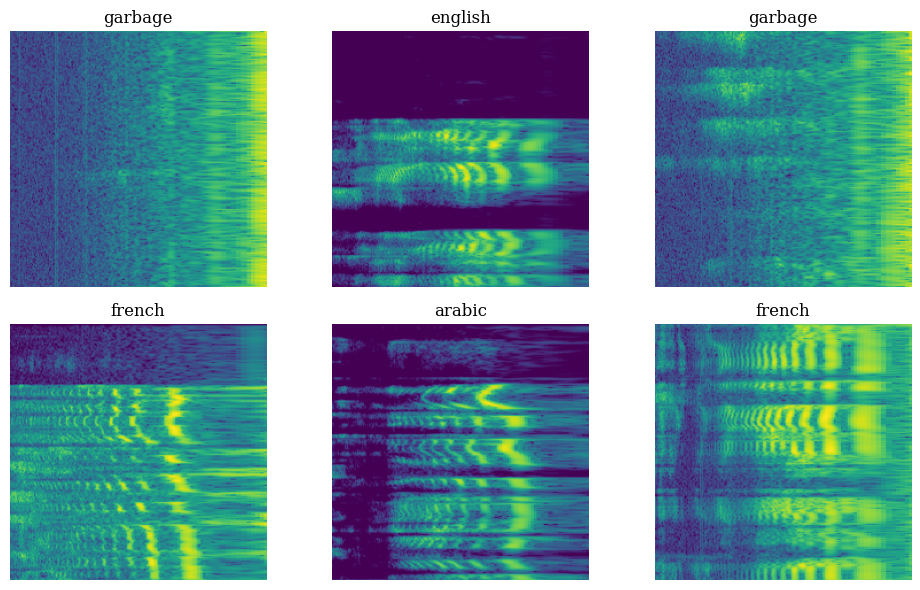

In [49]:
# Define the dataset path (Update if the path is different)
data_dir2 = Path("languages")
#data_dir2 = Path("/content/drive/MyDrive/ENDG_511_Lab2_Seleem_Badawy_Benjamin_Pele/data/radio_signal_identification/radio_signal_identification")

# List all spectrogram files in the directory
spectrogram_filenames = os.listdir(data_dir2)
# Number of spectrogram samples to visualize
num_samples = 6
# Randomly select 'num_samples' spectrogram files from the dataset
selected_files = sample(spectrogram_filenames, num_samples)

# Create a 2x3 grid for visualization
fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)
# Iterate through selected files and plot spectrograms
for i, ax in enumerate(axes.ravel()):
    # Load spectrogram image
    spectrogram_path = os.path.join(data_dir2, selected_files[i])
    spectrogram = np.array(Image.open(spectrogram_path).convert("L").resize((224, 224))).T
    # Ensure the spectrogram has correct dimensions
    spectrogram = np.squeeze(spectrogram)
    # Display the spectrogram
    ax.imshow(spectrogram, cmap="viridis")  # Ensuring a grayscale colormap
    ax.set_title(selected_files[i].split('_')[0])  # Extract class label from filename
    ax.axis("off")  # Hide axes for better visualization

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
import random
class LanguageDataset(Dataset):
    """
    A PyTorch Dataset class for loading and processing spectrogram images of radio signals.

    This dataset:
    - Loads images from a specified directory.
    - Applies preprocessing transformations (grayscale conversion, resizing, normalization).
    - Computes class weights for handling class imbalance.
    - Returns image tensors along with their respective labels.

    Attributes:
    ----------
    data_dir : str
        Path to the dataset directory.
    class_labels : list
        List of signal class names.
    class_weights : torch.Tensor
        Normalized inverse frequency weights for each class.
    data_files : list
        List of all image file names in the dataset.
    transform : torchvision.transforms.Compose
        Transformations applied to each image.
    """

    def __init__(self, data_dir, augment=False):
        """
        Initializes the dataset by loading class names, computing class frequencies, and setting up transformations.

        Parameters:
        ----------
        data_dir : str
            Path to the dataset directory.
        augment : bool
            Select adding time and frequency masking to spectrograms.
        """
        self.data_dir = data_dir

        # Define class labels (must match the dataset naming convention)
        self.class_labels = [ 'arabic', 'english', 'german', 'mandarin', 'spanish', 'garbage', 'french']
        self.random_crop = RandomCrop(size=(224, 224))  #size specified in below transforms
        self.augment = augment

        # Get all filenames from the dataset directory
        self.data_files = os.listdir(data_dir)

        # Compute class frequencies (how many samples per class exist)
        class_counts = {label: sum(1 for file in self.data_files if file.startswith(label)) for label in self.class_labels}

        # Compute class weights (inverse frequency) to handle class imbalance
        total_samples = sum(class_counts.values())
        class_weights = [1 / (count / total_samples) if count > 0 else 0 for count in class_counts.values()]

        # Normalize class weights so they sum to 1
        class_weights_sum = sum(class_weights)
        self.class_weights = torch.tensor([w / class_weights_sum for w in class_weights], dtype=torch.float)

        # Define image transformations
        self.transform = Compose([
            ToTensor(),
            Grayscale(num_output_channels=3),
            Resize((224, 224), interpolation=InterpolationMode.BICUBIC),
            RandomPerspective(distortion_scale=0.5, p=0.5),  # Perspective distortion
            Normalize(mean=[-0.9256, -0.8168, -0.5910], std=[0.1704, 0.1742, 0.1734])
        ])

    def __getitem__(self, index):
        """
        Loads an image, applies transformations, and returns it along with its label index.

        Parameters:
        ----------
        index : int
            Index of the sample in the dataset.

        Returns:
        -------
        tuple(torch.Tensor, torch.Tensor)
            Transformed image tensor and its corresponding label index.
        """
        # Get the filename of the sample
        file_name = self.data_files[index]
        file_path = os.path.join(self.data_dir, file_name)

        # Load the image
        image = Image.open(file_path)

        # Rotate 90 degrees (optional, remove if unnecessary)
        image = image.transpose(Image.ROTATE_90)

        # Ensure the image is in RGB mode (some formats might be grayscale)
        if image.mode != 'RGB':
            image = image.convert('RGB')
        
        image = self.random_crop(image)

       # Convert image to spectrogram (numpy array) and apply augmentation
        spectrogram = np.array(image)

        if self.augment:
            spectrogram = self.apply_spec_augment(spectrogram)

        # Convert to tensor and apply transformations
        image_tensor = self.transform(Image.fromarray(spectrogram))

        if self.augment:
            image_tensor = self.apply_noise(image_tensor)
        # Extract the class label from the filename
        class_label = file_name.split('_')[0]
        sample_number = file_name.split('_')[1]
        label_index = self.class_labels.index(class_label)

        # Apply transformations and return image with label
        return image_tensor, torch.tensor(label_index, dtype=torch.long), sample_number

    def __len__(self):
        """
        Returns the total number of samples in the dataset.

        Returns:
        -------
        int
            Number of files in the dataset.
        """
        return len(self.data_files)
    
    def apply_spec_augment(self, spectrogram):
        """Apply SpecAugment (time and frequency masking)"""
        spectrogram = self.time_mask(spectrogram)
        spectrogram = self.freq_mask(spectrogram)
        return spectrogram

    def time_mask(self, spectrogram, max_mask_size=50):
        """Apply time masking to the spectrogram"""
        n_frames = spectrogram.shape[1]
        mask_start = random.randint(0, n_frames - max_mask_size)
        mask_end = mask_start + random.randint(1, max_mask_size)
        spectrogram[:, mask_start:mask_end] = 0
        return spectrogram

    def freq_mask(self, spectrogram, max_mask_size=10):
        """Apply frequency masking to the spectrogram"""
        n_freqs = spectrogram.shape[0]
        mask_start = random.randint(0, n_freqs - max_mask_size)
        mask_end = mask_start + random.randint(1, max_mask_size)
        spectrogram[mask_start:mask_end, :] = 0
        return spectrogram
    
    def apply_noise(self, img_tensor, noise_level=0.03):
        noise = torch.randn_like(img_tensor) * noise_level
        return torch.clamp(img_tensor + noise, 0.0, 1.0)  # Keep within valid image range


In [ ]:
#Added to empty local GPU cache
import torch
import torch_directml
torch.cuda.empty_cache()

In [ ]:
# Fixed parameters
task = 'languages'
task_type = "classification"

# Configurable parameters
device = torch_directml.device()
train_test_split = 0.8
batch_size = 16
num_workers = 0
frozen_blocks = 0
label_smoothing = 0.1
lr = 1e-3#1e-2
weight_decay = 0.05
layer_decay = 0.75
model_size = 'small'
epochs = 20#50#10
warmup_epochs = 4#2#1
output_dir = 'models'

In [ ]:
import sklearn
def stratified_split(dataset, train_test_split):
    """
    Implement a Stratified Split for an imbalanced dataset.

    Parameters:
    -----------
    dataset : Dataset
        The dataset to split.
    train_test_split : float
        The proportion of data to allocate for training.

    Returns:
    --------
    tuple : (train_dataset, test_dataset)
        The stratified training and validation datasets.
    """
    splitter = sklearn.model_selection.StratifiedShuffleSplit(train_size=train_test_split, random_state=None)

    labels_iterable = [dataset[i][1] for i in range(len(dataset))]

    for train_index, test_index in splitter.split(range(len(dataset)), labels_iterable):

            train_dataset = [dataset[i] for i in train_index]
            test_dataset = [dataset[i] for i in test_index]

    return train_dataset, test_dataset


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm

dataset = LanguageDataset(Path('languages'))

dataset_train, dataset_val = stratified_split(dataset, train_test_split=0.8)

def calculate_mean_std(dataset, batch_size=32, num_workers=4):
    """
    Calculate custom mean and standard deviation for individual dataset statistics
    """
    # DataLoader to iterate through the dataset
    dataloader = DataLoader(dataset, batch_size=batch_size, num_workers=num_workers)
    
    # Initialize variables to calculate mean and std
    mean = torch.zeros(3)  # 3 channels: R, G, B
    std = torch.zeros(3)
    total_images = 0

    # Iterate through the dataset
    for inputs, _, _ in tqdm(dataloader):
        # Calculate mean and std for the batch
        batch_samples = inputs.size(0)
        inputs = inputs.view(batch_samples, inputs.size(1), -1) 
        mean += inputs.mean(2).mean(0) * batch_samples  # Mean per channel
        std += inputs.std(2).std(0) * batch_samples  # Std per channel
        total_images += batch_samples

    # Final mean and std
    mean /= total_images
    std /= total_images

    return mean, std

mean, std = calculate_mean_std(dataset_train)

print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")


KeyboardInterrupt: 

In [ ]:
# Load dataset
dataset = LanguageDataset(Path('languages'))  # Update path if needed

#dataset_train = [ ]
#dataset_val = [ ]

#loop used to try ensuring samples from same audio file were matched as either training or validation data

#for item in dataset:
#    image, label, sample_number = item
#    sample_number = int(sample_number.replace(".png", "")) // 1000
#    print("number is: ",sample_number)
#    if sample_number < 1000: #condition for homemade data
#        dataset_train.append(item)
#    else:
#        if (sample_number % 10 in [0, 1, 2, 3, 4, 5, 6, 7]): #make as close as possible to 80-20 split
#            dataset_train.append(item)
#        else:
#            dataset_val.append(item)
#print("val length: ", len(dataset_val))
#print("train length: ", len(dataset_train))
#print(f"train test split is {len(dataset_train)/(len(dataset_train) + len(dataset_val))}")


# ⁉️Replace the line below with your stratified split implementation
dataset_train, dataset_val = stratified_split(dataset, train_test_split=0.8)

#Used to split into test set as well for extra verification if needed
#dataset_val, dataset_test = stratified_split(dataset_val, train_test_split=0.5) #split val set in half to hide some data

# Create dataloaders
data_loader_train = DataLoader(dataset_train, batch_size=batch_size, num_workers=num_workers,
                               pin_memory=True, drop_last=True)
data_loader_val = DataLoader(dataset_val, batch_size=batch_size, num_workers=num_workers,
                             pin_memory=True, drop_last=False)

#Extra dataloader for test set if used
#data_loader_test = DataLoader(dataset_test, batch_size=batch_size, num_workers=num_workers,
#                             pin_memory=True, drop_last=False)

# Initialize Vision Transformer model based on size
if model_size == 'small':
    model = VisionTransformer(task=task, patch_size=16, embed_dim=512, depth=12, num_heads=8,
                              mlp_ratio=4, qkv_bias=True, in_chans=1,
                              norm_layer=partial(nn.LayerNorm, eps=1e-6),
                              num_classes=5)
elif model_size == 'medium':
    model = VisionTransformer(task=task, patch_size=16, embed_dim=768, depth=12, num_heads=12,
                              mlp_ratio=4, qkv_bias=True, in_chans=1,
                              norm_layer=partial(nn.LayerNorm, eps=1e-6),
                              num_classes=20)
elif model_size == 'large':
    model = VisionTransformer(task=task, patch_size=16, embed_dim=1024, depth=24, num_heads=16,
                              mlp_ratio=4, qkv_bias=True, in_chans=1,
                              norm_layer=partial(nn.LayerNorm, eps=1e-6),
                              num_classes=20)
else:
    raise ValueError('Model size must be either small, medium, or large')

# Load pretrained weights and freeze encoder blocks
#checkpoint_path = Path('pretrained_small_75.pth')  # Update if needed
#model.load_from_pretrained(checkpoint_path)
#model.freeze_encoder(frozen_blocks)

#force mobilenets_v2
model = models.mobilenet_v2(pretrained=True)
freeze_model(model, frozen_blocks)
model.classifier[1] = nn.Sequential(
    nn.Linear(model.classifier[1].in_features, 128),
    nn.ReLU(),
    nn.Dropout(0.2), #overfitting help
    nn.Linear(128, 7)  # Change output to 7 classes
)

#commented out, was used for Resnet18 tests

#model.fc = nn.Sequential(
#    nn.Dropout(0.3),
#    nn.Linear(model.fc.in_features, 256),
#    nn.BatchNorm1d(256),
#    nn.ReLU(inplace=True),
#    
#    nn.Dropout(0.3),
#    nn.Linear(256, 128),
#    nn.BatchNorm1d(128),
#    nn.ReLU(inplace=True),
#    
#    nn.Linear(128, 7)
#)
model.to(device)

# Initialize optimizer
param_groups = param_groups_lrd(model, weight_decay=weight_decay)
optimizer = torch.optim.AdamW(param_groups, lr=lr)
loss_scaler = NativeScalerWithGradNormCount()


#Used to test add cosine annealing scheduler for better LR adjustment
#from torch.optim.lr_scheduler import CosineAnnealingLR
#scheduler = CosineAnnealingLR(optimizer, T_max=10)

# Display model info
n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Model: {model}")
print(f"Number of parameters: {n_parameters / 1.e6:.2f}M")
print(f"Base learning rate: {lr * 256 / batch_size:.2e}")
print(f"Actual learning rate: {lr:.2e}")

# Define loss function
#criterion = nn.CrossEntropyLoss()
#print(f"Criterion: {criterion}")

#create FocalLoss function for testing a different loss function
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super().__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        
    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', weight=self.alpha)
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss
        
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

#Use FocalLoss instead for tests
#criterion = FocalLoss(alpha=dataset.class_weights.to(device), gamma=2.0)

criterion = nn.CrossEntropyLoss(weight=dataset.class_weights.to(device))
print(f"Criterion: {criterion}")

Model: MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(9

C:\Users\bpele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\bpele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\bpele\AppData\Local\Temp\ipykernel_17780\1719382385.py:95: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cu

100%|██████████| 100/100 [00:29<00:00,  3.37it/s]


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.48E-03


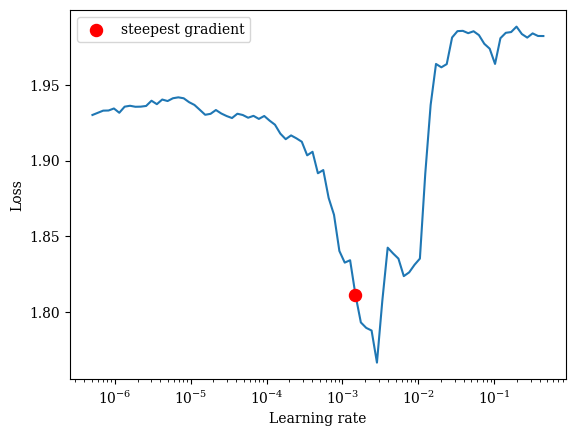

In [ ]:
#Check if the chosen LR is way off the optimal one for given parameters
from torch_lr_finder import LRFinder

model = model.to(device)
criterion = nn.CrossEntropyLoss(weight=dataset.class_weights.to(device))
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-7)
lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(data_loader_train, end_lr=1, num_iter=100)
lr_finder.plot()
lr_finder.reset()

In [ ]:
print(f"Starting training for {epochs} epochs...")

start_time = time.time()
max_accuracy = 0.0
for epoch in range(epochs):
    # Train for one epoch
    train_stats = train_one_epoch(model, criterion, data_loader_train, optimizer, device, epoch,
                                  warmup_epochs, lr, loss_scaler, task_type)

    # Evaluate the model
    test_stats = evaluate(data_loader_val, model, criterion, device, task_type)

    # Log accuracy
    print(f"Accuracy on {len(dataset_val)} test samples: {test_stats['acc1']:.3f}%")
    max_accuracy = max(max_accuracy, test_stats["acc1"])
    print(f"Max accuracy so far: {max_accuracy:.3f}%")

#save model for submission
torch.save(model, os.path.join(output_dir, f'model_language_mobilenet_20_epoch_new_normalize.pth'))
# Compute total training time
total_time = time.time() - start_time
total_time_str = str(datetime.timedelta(seconds=int(total_time)))
print(f"Total training time: {total_time_str}")

C:\Users\bpele\AppData\Local\Temp\ipykernel_17780\6492292.py:55: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
C:\Users\bpele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\amp\autocast_mode.py:265: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Starting training for 20 epochs...
Epoch: [0]  [  0/410]  eta: 0:01:52  lr: 0.000000  loss: 1.9813 (1.9813)  acc1: 18.7500 (18.7500)  acc3: 43.7500 (43.7500)  time: 0.2753  data: 0.0010
Epoch: [0]  [ 20/410]  eta: 0:01:53  lr: 0.000012  loss: 1.9264 (1.9460)  acc1: 18.7500 (16.6667)  acc3: 43.7500 (47.0238)  time: 0.2923  data: 0.0012
Epoch: [0]  [ 40/410]  eta: 0:01:44  lr: 0.000024  loss: 1.9520 (1.9487)  acc1: 18.7500 (16.7683)  acc3: 50.0000 (47.5610)  time: 0.2743  data: 0.0015
Epoch: [0]  [ 60/410]  eta: 0:01:38  lr: 0.000037  loss: 1.8535 (1.9203)  acc1: 25.0000 (20.0820)  acc3: 62.5000 (51.1270)  time: 0.2738  data: 0.0016
Epoch: [0]  [ 80/410]  eta: 0:01:31  lr: 0.000049  loss: 1.8092 (1.8937)  acc1: 31.2500 (23.4568)  acc3: 62.5000 (54.3981)  time: 0.2734  data: 0.0016
Epoch: [0]  [100/410]  eta: 0:01:26  lr: 0.000061  loss: 1.6713 (1.8548)  acc1: 37.5000 (26.4233)  acc3: 75.0000 (57.3020)  time: 0.2748  data: 0.0016
Epoch: [0]  [120/410]  eta: 0:01:20  lr: 0.000073  loss: 1.

C:\Users\bpele\AppData\Local\Temp\ipykernel_17780\6492292.py:122: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Test:  [ 10/103]  eta: 0:00:03  loss: 1.0498 (0.9877)  acc1: 62.5000 (62.5000)  acc3: 87.5000 (87.5000)  time: 0.0332  data: 0.0011
Test:  [ 20/103]  eta: 0:00:02  loss: 0.9994 (0.9871)  acc1: 62.5000 (63.9881)  acc3: 93.7500 (89.8810)  time: 0.0332  data: 0.0011
Test:  [ 30/103]  eta: 0:00:02  loss: 0.8967 (0.9656)  acc1: 68.7500 (66.7339)  acc3: 93.7500 (91.1290)  time: 0.0332  data: 0.0011
Test:  [ 40/103]  eta: 0:00:02  loss: 0.8416 (0.9433)  acc1: 68.7500 (67.3780)  acc3: 93.7500 (92.0732)  time: 0.0330  data: 0.0011
Test:  [ 50/103]  eta: 0:00:01  loss: 0.8435 (0.9326)  acc1: 68.7500 (67.5245)  acc3: 93.7500 (92.4020)  time: 0.0330  data: 0.0011
Test:  [ 60/103]  eta: 0:00:01  loss: 0.8453 (0.9236)  acc1: 68.7500 (68.6475)  acc3: 93.7500 (92.9303)  time: 0.0331  data: 0.0011
Test:  [ 70/103]  eta: 0:00:01  loss: 0.8754 (0.9139)  acc1: 68.7500 (68.6620)  acc3: 93.7500 (93.2218)  time: 0.0331  data: 0.0012
Test:  [ 80/103]  eta: 0:00:00  loss: 0.8489 (0.9116)  acc1: 68.7500 (68.209

In [168]:
#prune model
import torch.nn.utils.prune as prune
import torch.nn as nn

model = torch.load(r"C:\Users\bpele\ENDG511_Final_Project\models\model_language_mobilenet_20_epoch_new_normalize.pth")
def apply_structured_pruning(model, amount=0.3, dim=0):
    """
    Applies structured pruning to all Conv2d and Linear layers
    by removing entire channels (dim=0) or neurons (dim=1).
    """
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv2d):
            prune.ln_structured(module, name="weight", amount=amount, n=2, dim=0)  # Prune output channels of Conv layers
            prune.remove(module, "weight")
        elif isinstance(module, nn.Linear):
            prune.ln_structured(module, name="weight", amount=amount, n=2, dim=0)  # Prune neurons for FC layers
            prune.remove(module, "weight")
    return model

sparsity = 0.1 #percentage to be pruned
model_pruned = apply_structured_pruning(model, amount=sparsity)
print(model_pruned)

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

C:\Users\bpele\AppData\Local\Temp\ipykernel_17780\3223643137.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(r"C:\Users\bpele\ENDG511_Final_Project\mo

In [ ]:
#train pruned model again to forward weights
print(f"Starting training for {epochs} epochs...")

start_time = time.time()
max_accuracy = 0.0
for epoch in range(epochs):
    # Train for one epoch
    train_stats = train_one_epoch(model_pruned, criterion, data_loader_train, optimizer, device, epoch,
                                  warmup_epochs, lr, loss_scaler, task_type)

    # Evaluate the model
    test_stats = evaluate(data_loader_val, model_pruned, criterion, device, task_type)

    # Log accuracy
    print(f"Accuracy on {len(dataset_val)} test samples: {test_stats['acc1']:.3f}%")
    max_accuracy = max(max_accuracy, test_stats["acc1"])
    print(f"Max accuracy so far: {max_accuracy:.3f}%")

#save model for submission
torch.save(model_pruned, os.path.join(output_dir, f'model_language_mobilenet_20_epoch_new_normalize_pruned.pth'))
# Compute total training time
total_time = time.time() - start_time
total_time_str = str(datetime.timedelta(seconds=int(total_time)))
print(f"Total training time: {total_time_str}")

Starting training for 20 epochs...
Epoch: [0]  [  0/410]  eta: 0:01:07  lr: 0.000000  loss: 1.7153 (1.7153)  acc1: 68.7500 (68.7500)  acc3: 93.7500 (93.7500)  time: 0.1650  data: 0.0030


C:\Users\bpele\AppData\Local\Temp\ipykernel_17780\6492292.py:55: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: [0]  [ 20/410]  eta: 0:01:03  lr: 0.000012  loss: 0.5247 (0.6592)  acc1: 81.2500 (80.0595)  acc3: 100.0000 (97.3214)  time: 0.1621  data: 0.0014
Epoch: [0]  [ 40/410]  eta: 0:00:59  lr: 0.000024  loss: 1.0129 (0.8470)  acc1: 75.0000 (78.2012)  acc3: 93.7500 (96.3415)  time: 0.1609  data: 0.0012
Epoch: [0]  [ 60/410]  eta: 0:00:56  lr: 0.000037  loss: 0.8971 (0.8905)  acc1: 75.0000 (77.2541)  acc3: 100.0000 (96.6189)  time: 0.1614  data: 0.0013
Epoch: [0]  [ 80/410]  eta: 0:00:53  lr: 0.000049  loss: 0.8476 (0.8959)  acc1: 81.2500 (77.7006)  acc3: 100.0000 (96.7593)  time: 0.1606  data: 0.0014
Epoch: [0]  [100/410]  eta: 0:00:49  lr: 0.000061  loss: 0.9167 (0.8962)  acc1: 75.0000 (77.4752)  acc3: 100.0000 (96.7822)  time: 0.1605  data: 0.0013
Epoch: [0]  [120/410]  eta: 0:00:46  lr: 0.000073  loss: 0.8734 (0.9156)  acc1: 75.0000 (77.6860)  acc3: 100.0000 (96.5909)  time: 0.1602  data: 0.0013
Epoch: [0]  [140/410]  eta: 0:00:43  lr: 0.000085  loss: 0.7122 (0.9012)  acc1: 81.2500 (

C:\Users\bpele\AppData\Local\Temp\ipykernel_17780\6492292.py:122: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Test:  [ 10/103]  eta: 0:00:03  loss: 0.4671 (0.6298)  acc1: 87.5000 (84.6591)  acc3: 100.0000 (100.0000)  time: 0.0329  data: 0.0012
Test:  [ 20/103]  eta: 0:00:02  loss: 0.4671 (0.6801)  acc1: 81.2500 (82.1429)  acc3: 100.0000 (99.1071)  time: 0.0330  data: 0.0012
Test:  [ 30/103]  eta: 0:00:02  loss: 0.5955 (0.6984)  acc1: 81.2500 (83.0645)  acc3: 100.0000 (98.7903)  time: 0.0330  data: 0.0012
Test:  [ 40/103]  eta: 0:00:02  loss: 0.5027 (0.6825)  acc1: 87.5000 (83.2317)  acc3: 100.0000 (98.7805)  time: 0.0327  data: 0.0012
Test:  [ 50/103]  eta: 0:00:01  loss: 0.5472 (0.7060)  acc1: 81.2500 (82.7206)  acc3: 100.0000 (98.5294)  time: 0.0327  data: 0.0012
Test:  [ 60/103]  eta: 0:00:01  loss: 0.6413 (0.7158)  acc1: 81.2500 (82.5820)  acc3: 100.0000 (98.5656)  time: 0.0328  data: 0.0012
Test:  [ 70/103]  eta: 0:00:01  loss: 0.6148 (0.7138)  acc1: 81.2500 (81.8662)  acc3: 100.0000 (98.3275)  time: 0.0328  data: 0.0010
Test:  [ 80/103]  eta: 0:00:00  loss: 0.5487 (0.7178)  acc1: 81.2500

In [ ]:
def calculate_sparsity(model):
    total_params = 0
    zero_params = 0
    
    for name, module in model.named_modules():
        if isinstance(module, nn.Linear) or isinstance(module, nn.Conv2d):
            total_params += module.weight.numel()
            zero_params += torch.sum(module.weight == 0).item()
    
    sparsity = 100.0 * zero_params / total_params
    return sparsity

In [176]:
#verify sparsity of model
pruned_sparsity = calculate_sparsity(model_pruned)
print(f"pruned model sparsity: {pruned_sparsity:.2f}%")

pruned model sparsity: 10.01%


In [180]:
#quantize model
import torch.quantization

model_quant = model_pruned
quantized_model = torch.quantization.quantize_dynamic(
    model_quant,  
    {torch.nn.Linear},  # which layers to quantize, Conv2d can't be quantized easily and Mobilenets is small anyway
    dtype=torch.qint8  # can also be torch.float16
)
torch.save(quantized_model, "quantized_pruned_model.pth")

import os
print(f"Quantized model size: {os.path.getsize('quantized_pruned_model.pth') / 1e6:.2f} MB")
print(f"model size: {os.path.getsize('models/model_language_mobilenet_20_epoch_new_normalize_pruned.pth') / 1e6:.2f} MB")


Quantized model size: 3.08 MB
model size: 14.27 MB


RuntimeError: The size of tensor a (0) must match the size of tensor b (128) at non-singleton dimension 0

In [ ]:
#attempt at k-fold validation, unused it did not improve accuracy
from sklearn.model_selection import StratifiedKFold

# Set number of folds
seed = 42
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=seed)

# Prepare labels for stratification
labels = [dataset[i][1] for i in range(len(dataset))]

# Track fold metrics
fold_results = []

print(f"Starting training for {epochs} epochs...")

start_time = time.time()

for fold, (train_idx, val_idx) in enumerate(skf.split(np.zeros(len(labels)), labels)):
    print(f"\n Fold {fold + 1}/{num_folds}")

    # Split datasets
    dataset_train = torch.utils.data.Subset(dataset, train_idx)
    dataset_val = torch.utils.data.Subset(dataset, val_idx)

    # Create dataloaders
    data_loader_train = DataLoader(dataset_train, batch_size=batch_size, num_workers=num_workers,
                                   pin_memory=True, drop_last=True)
    data_loader_val = DataLoader(dataset_val, batch_size=batch_size, num_workers=num_workers,
                                 pin_memory=True, drop_last=False)

    # Initialize fresh model for each fold
    model = models.mobilenet_v2(pretrained=True)
    freeze_model(model, frozen_blocks)
    model.classifier[1] = nn.Sequential(
        nn.Linear(model.classifier[1].in_features, 128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128, 7)
    )
    model.to(device)

    # Optimizer and criterion
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.CrossEntropyLoss(weight=dataset.class_weights.to(device))  # Optional: use FocalLoss
    loss_scaler = NativeScalerWithGradNormCount()

    # Train and evaluate this fold
    best_val_acc = 0.0
    for epoch in range(epochs):
        train_stats = train_one_epoch(model, criterion, data_loader_train, optimizer, device, epoch, warmup_epochs, lr, loss_scaler)
        val_stats = evaluate(data_loader_val, model, criterion, device)

        if val_stats['acc1'] > best_val_acc:
            best_val_acc = val_stats['acc1']

        print(f"Epoch {epoch + 1}: Train Acc: {train_stats['acc1']:.4f}, Val Acc: {val_stats['acc1']:.4f}")

    fold_results.append(best_val_acc)
    print(f" Best Val Accuracy for Fold {fold + 1}: {best_val_acc:.4f}")

# Final summary
print(f"\n K-Fold Validation Results:")
print(f"Mean Accuracy: {np.mean(fold_results):.4f}, Std: {np.std(fold_results):.4f}")
#save model for submission
torch.save(model, os.path.join(output_dir, f'model_language_mobilenet_20_epoch_k_fold.pth'))
# Compute total training time
total_time = time.time() - start_time
total_time_str = str(datetime.timedelta(seconds=int(total_time)))
print(f"Total training time: {total_time_str}")



Starting training for 20 epochs...

🔁 Fold 1/5


C:\Users\bpele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\bpele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\bpele\AppData\Local\Temp\ipykernel_17780\1719382385.py:95: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cu

Epoch: [0]  [  0/410]  eta: 0:02:10  lr: 0.000000  loss: 2.1878 (2.1878)  acc1: 0.0000 (0.0000)  acc3: 6.2500 (6.2500)  time: 0.3179  data: 0.0731
Epoch: [0]  [ 20/410]  eta: 0:02:37  lr: 0.000024  loss: 2.0547 (2.0468)  acc1: 6.2500 (10.1190)  acc3: 12.5000 (27.0833)  time: 0.4073  data: 0.1125
Epoch: [0]  [ 40/410]  eta: 0:02:35  lr: 0.000049  loss: 1.2518 (1.6648)  acc1: 100.0000 (50.4573)  acc3: 100.0000 (62.1951)  time: 0.4368  data: 0.1055
Epoch: [0]  [ 60/410]  eta: 0:02:24  lr: 0.000073  loss: 0.2653 (1.2239)  acc1: 100.0000 (66.7008)  acc3: 100.0000 (74.5902)  time: 0.4024  data: 0.0930
Epoch: [0]  [ 80/410]  eta: 0:02:16  lr: 0.000098  loss: 0.0405 (0.9338)  acc1: 100.0000 (74.9228)  acc3: 100.0000 (80.8642)  time: 0.4153  data: 0.1046
Epoch: [0]  [100/410]  eta: 0:02:08  lr: 0.000122  loss: 0.0150 (0.7522)  acc1: 100.0000 (79.8886)  acc3: 100.0000 (84.6535)  time: 0.4119  data: 0.1004
Epoch: [0]  [120/410]  eta: 0:01:59  lr: 0.000146  loss: 2.0922 (1.0665)  acc1: 0.0000 (72.

C:\Users\bpele\AppData\Local\Temp\ipykernel_17780\6492292.py:122: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Test:  [ 10/103]  eta: 0:00:11  loss: 6.2943 (6.6385)  acc1: 0.0000 (0.0000)  acc3: 0.0000 (0.0000)  time: 0.1221  data: 0.0880
Test:  [ 20/103]  eta: 0:00:11  loss: 6.3870 (6.5568)  acc1: 0.0000 (0.0000)  acc3: 0.0000 (0.0000)  time: 0.1396  data: 0.1052
Test:  [ 30/103]  eta: 0:00:10  loss: 6.1112 (6.3710)  acc1: 0.0000 (0.0000)  acc3: 0.0000 (0.0000)  time: 0.1639  data: 0.1263
Test:  [ 40/103]  eta: 0:00:09  loss: 5.6662 (6.1933)  acc1: 0.0000 (0.0000)  acc3: 0.0000 (0.0000)  time: 0.1528  data: 0.1150
Test:  [ 50/103]  eta: 0:00:07  loss: 6.0376 (6.2323)  acc1: 0.0000 (0.0000)  acc3: 0.0000 (0.0000)  time: 0.1308  data: 0.0954
Test:  [ 60/103]  eta: 0:00:06  loss: 6.2950 (6.1827)  acc1: 0.0000 (0.0000)  acc3: 0.0000 (0.0000)  time: 0.1310  data: 0.0958
Test:  [ 70/103]  eta: 0:00:04  loss: 5.6688 (5.9608)  acc1: 0.0000 (0.0000)  acc3: 0.0000 (5.0176)  time: 0.1391  data: 0.1032
Test:  [ 80/103]  eta: 0:00:03  loss: 2.4827 (5.5077)  acc1: 0.0000 (0.0000)  acc3: 100.0000 (16.7438)  

Processing Validation Batches: 100%|██████████| 103/103 [00:03<00:00, 31.88it/s]


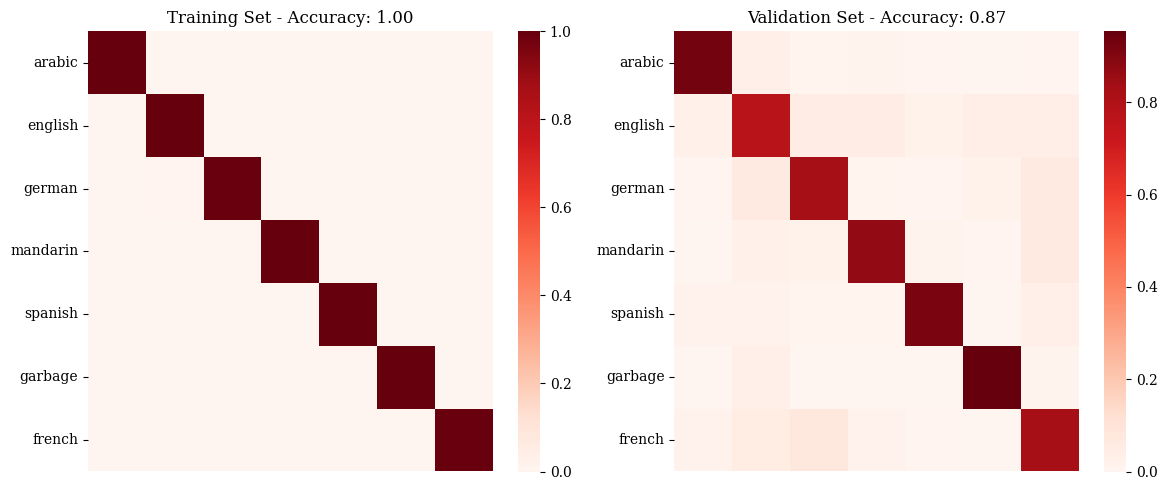

In [ ]:
# Define class names for labeling confusion matrices
class_names = dataset.class_labels

# -------------------------
# 📌 Compute Predictions on Training Data
# -------------------------
all_labels_train = []
all_preds_train = []

with torch.no_grad():
    for samples, targets, filename in tqdm(data_loader_train, desc='Processing Training Batches'):
        samples, targets, filename = samples.to(device), targets.to(device), filename
        output = model(samples)  # Forward pass
        all_preds_train.extend(output.argmax(dim=-1).cpu().numpy())  # Get predicted class
        all_labels_train.extend(targets.cpu().numpy())  # Store true labels

# -------------------------
# 📌 Compute Predictions on Validation Data
# -------------------------
all_labels_val = []
all_preds_val = []

with torch.no_grad():
    for samples, targets, filename in tqdm(data_loader_val, desc='Processing Validation Batches'):
        samples, targets, filename = samples.to(device), targets.to(device), filename
        output = model(samples)  # Forward pass
        all_preds_val.extend(output.argmax(dim=-1).cpu().numpy())  # Get predicted class
        all_labels_val.extend(targets.cpu().numpy())  # Store true labels

#Used for test dataset when needed

#all_labels_test = []
#all_preds_test = []
#
#with torch.no_grad():
#    for samples, targets, filename in tqdm(data_loader_test, desc='Processing Test Batches'):
#        samples, targets, filename = samples.to(device), targets.to(device), filename
#        output = model(samples)  # Forward pass
#        all_preds_test.extend(output.argmax(dim=-1).cpu().numpy())  # Get predicted class
#        all_labels_test.extend(targets.cpu().numpy())  # Store true labels

# -------------------------
# 📌 Compute Confusion Matrices
# -------------------------
conf_mat_train = confusion_matrix(all_labels_train, all_preds_train)
conf_mat_val = confusion_matrix(all_labels_val, all_preds_val)

#Used for test dataset when needed
#conf_mat_test = confusion_matrix(all_labels_test, all_preds_test)

# Compute accuracy
accuracy_train = np.trace(conf_mat_train) / np.sum(conf_mat_train)  # Correct predictions / total
accuracy_val = np.trace(conf_mat_val) / np.sum(conf_mat_val)

#Used for test dataset when needed
#accuracy_test = np.trace(conf_mat_test) / np.sum(conf_mat_test)

# Convert to float for normalization
conf_mat_train = conf_mat_train.astype(np.float32)
conf_mat_val = conf_mat_val.astype(np.float32)

#Used for test dataset when needed
#conf_mat_test = conf_mat_test.astype(np.float32)

# Normalize confusion matrices by row (i.e., per-class normalization)
for i in range(len(class_names)):
    conf_mat_train[i] /= np.sum(conf_mat_train[i])  # Normalize training confusion matrix
    conf_mat_val[i] /= np.sum(conf_mat_val[i])  # Normalize val confusion matrix\

    #Used for test dataset when needed  
    #conf_mat_test[i] /= np.sum(conf_mat_test[i])  # Normalize val confusion matrix

# -------------------------
# 📌 Plot Confusion Matrices
# -------------------------
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Create side-by-side subplots

# Plot Training Confusion Matrix
sns.heatmap(conf_mat_train, cmap='Reds', yticklabels=class_names, ax=axs[0])
axs[0].set_title(f'Training Set - Accuracy: {accuracy_train:.2f}')
axs[0].tick_params(axis='y', labelsize=10)
axs[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Plot Test Confusion Matrix
sns.heatmap(conf_mat_val, cmap='Reds', yticklabels=class_names, ax=axs[1])
axs[1].set_title(f'Validation Set - Accuracy: {accuracy_val:.2f}')
axs[1].tick_params(axis='y', labelsize=10)
axs[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

#Used for test dataset when needed
#sns.heatmap(conf_mat_test, cmap='Reds', yticklabels=class_names, ax=axs[2])
#axs[2].set_title(f'Validation Set - Accuracy: {accuracy_test:.2f}')
#axs[2].tick_params(axis='y', labelsize=10)
#axs[2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Adjust layout for better readability
plt.tight_layout()
plt.savefig(Path('conf_radio_signal.png'), dpi=400)  # Save figure
plt.show()

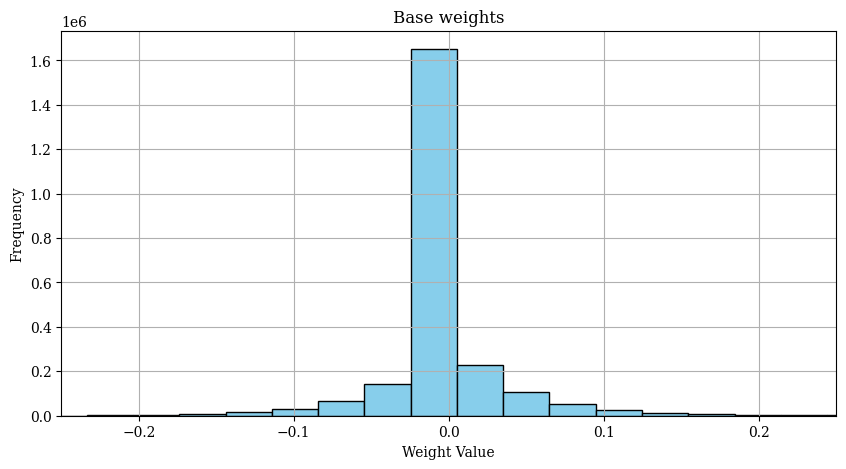

In [92]:
import matplotlib.pyplot as plt

def plot_weight_histogram(model, title="Weight Histogram"):
    all_weights = []

    for name, param in model.named_parameters():
        if 'weight' in name and param.requires_grad:
            all_weights.extend(param.detach().cpu().numpy().flatten())

    plt.figure(figsize=(10, 5))
    plt.hist(all_weights, bins=100, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.xlim((-0.25, 0.25))
    plt.show()

plot_weight_histogram(model, title="Base weights")

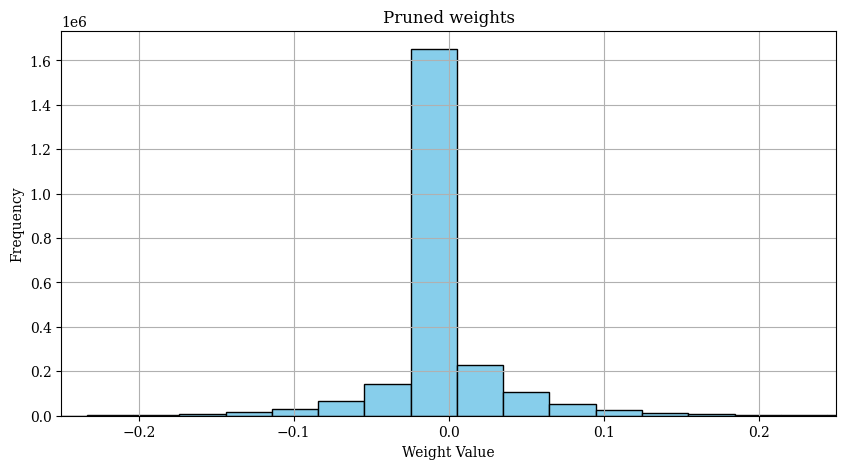

In [93]:
plot_weight_histogram(model_pruned, title="Pruned weights")

Processing Validation Batches: 100%|██████████| 103/103 [00:03<00:00, 31.93it/s]


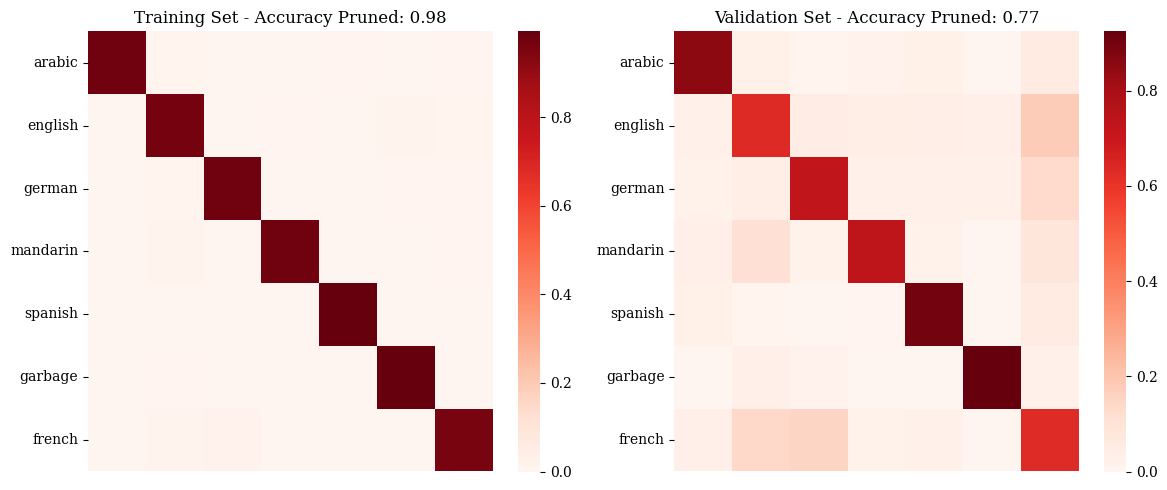

In [ ]:
# Define class names for labeling confusion matrices
class_names = dataset.class_labels

# -------------------------
# 📌 Compute Predictions on Training Data
# -------------------------
all_labels_train_pruned = []
all_preds_train_pruned = []

with torch.no_grad():
    for samples, targets, filename in tqdm(data_loader_train, desc='Processing Training Batches'):
        samples, targets, filename = samples.to(device), targets.to(device), filename
        output = model_pruned(samples)  # Forward pass
        all_preds_train_pruned.extend(output.argmax(dim=-1).cpu().numpy())  # Get predicted class
        all_labels_train_pruned.extend(targets.cpu().numpy())  # Store true labels

# -------------------------
# 📌 Compute Predictions on Validation Data
# -------------------------
all_labels_val_pruned = []
all_preds_val_pruned = []

with torch.no_grad():
    for samples, targets, filename in tqdm(data_loader_val, desc='Processing Validation Batches'):
        samples, targets, filename = samples.to(device), targets.to(device), filename
        output = model_pruned(samples)  # Forward pass
        all_preds_val_pruned.extend(output.argmax(dim=-1).cpu().numpy())  # Get predicted class
        all_labels_val_pruned.extend(targets.cpu().numpy())  # Store true labels


#Used for test dataset when needed
#all_labels_test = []
#all_preds_test = []
#
#with torch.no_grad():
#    for samples, targets, filename in tqdm(data_loader_test, desc='Processing Test Batches'):
#        samples, targets, filename = samples.to(device), targets.to(device), filename
#        output = model(samples)  # Forward pass
#        all_preds_test.extend(output.argmax(dim=-1).cpu().numpy())  # Get predicted class
#        all_labels_test.extend(targets.cpu().numpy())  # Store true labels

# -------------------------
# 📌 Compute Confusion Matrices
# -------------------------
conf_mat_train_pruned = confusion_matrix(all_labels_train_pruned, all_preds_train_pruned)
conf_mat_val_pruned = confusion_matrix(all_labels_val_pruned, all_preds_val_pruned)

#Used for test dataset when needed
#conf_mat_test = confusion_matrix(all_labels_test, all_preds_test)

# Compute accuracy
accuracy_train_pruned = np.trace(conf_mat_train_pruned) / np.sum(conf_mat_train_pruned)  # Correct predictions / total
accuracy_val_pruned = np.trace(conf_mat_val_pruned) / np.sum(conf_mat_val_pruned)

#Used for test dataset when needed
#accuracy_test = np.trace(conf_mat_test) / np.sum(conf_mat_test)

# Convert to float for normalization
conf_mat_train_pruned = conf_mat_train_pruned.astype(np.float32)
conf_mat_val_pruned = conf_mat_val_pruned.astype(np.float32)

#Used for test dataset when needed
#conf_mat_test = conf_mat_test.astype(np.float32)

# Normalize confusion matrices by row (i.e., per-class normalization)
for i in range(len(class_names)):
    conf_mat_train_pruned[i] /= np.sum(conf_mat_train_pruned[i])  # Normalize training confusion matrix
    conf_mat_val_pruned[i] /= np.sum(conf_mat_val_pruned[i])  # Normalize val confusion matrix

    #Used for test dataset when needed
    #conf_mat_test[i] /= np.sum(conf_mat_test[i])  # Normalize val confusion matrix

# -------------------------
# 📌 Plot Confusion Matrices
# -------------------------
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Create side-by-side subplots

# Plot Training Confusion Matrix
sns.heatmap(conf_mat_train_pruned, cmap='Reds', yticklabels=class_names, ax=axs[0])
axs[0].set_title(f'Training Set - Accuracy Pruned: {accuracy_train_pruned:.2f}')
axs[0].tick_params(axis='y', labelsize=10)
axs[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Plot Test Confusion Matrix
sns.heatmap(conf_mat_val_pruned, cmap='Reds', yticklabels=class_names, ax=axs[1])
axs[1].set_title(f'Validation Set - Accuracy Pruned: {accuracy_val_pruned:.2f}')
axs[1].tick_params(axis='y', labelsize=10)
axs[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

#Used for test dataset when needed
#sns.heatmap(conf_mat_test, cmap='Reds', yticklabels=class_names, ax=axs[2])
#axs[2].set_title(f'Validation Set - Accuracy: {accuracy_test:.2f}')
#axs[2].tick_params(axis='y', labelsize=10)
#axs[2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Adjust layout for better readability
plt.tight_layout()
plt.savefig(Path('conf_radio_signal_pruned.png'), dpi=400)  # Save figure
plt.show()